<a href="https://colab.research.google.com/github/zzozzo/Datathon/blob/main/ohjihoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

C_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Case.csv')
PI_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/PatientInfo.csv')
Pol_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Policy.csv')
R_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Region.csv')
ST_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/SearchTrend.csv')
SF_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/SeoulFloating.csv')
T_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Time.csv')
TA_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeAge.csv')
TG_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeGender.csv')
TP_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeProvince.csv')
W_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Weather.csv')


In [56]:
PI_df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [71]:
PI_df["age"] = PI_df["age"].astype("category")
PI_df["age"]

0       50s
1       30s
2       50s
3       20s
4       20s
       ... 
5160    30s
5161    NaN
5162    NaN
5163    NaN
5164    NaN
Name: age, Length: 5165, dtype: category
Categories (11, object): ['0s', '100s', '10s', '20s', ..., '60s', '70s', '80s', '90s']

In [74]:
PI_df["age"].cat.categories = ["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "100s"]

In [76]:
PI_df["age"] = PI_df["age"].cat.set_categories (
    ["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "100s"]
    )
PI_df["age"]

0       60s
1       40s
2       60s
3       30s
4       30s
       ... 
5160    40s
5161    NaN
5162    NaN
5163    NaN
5164    NaN
Name: age, Length: 5165, dtype: category
Categories (11, object): ['0s', '10s', '20s', '30s', ..., '70s', '80s', '90s', '100s']

In [78]:
PI_df.sort_values(by="age")

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3902,6001000145,male,0s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,2020-02-29,2020-04-07,NaN,released
4391,6001000634,female,0s,Korea,Gyeongsangbuk-do,Gyeongsan-si,overseas inflow,NaN,NaN,NaN,2020-05-11,2020-06-25,NaN,released
2691,2000000479,male,0s,Korea,Gyeonggi-do,Suwon-si,overseas inflow,NaN,NaN,NaN,2020-03-31,NaN,NaN,isolated
4981,6023000022,male,0s,Korea,Gyeongsangbuk-do,Pohang-si,NaN,NaN,NaN,NaN,2020-02-29,NaN,NaN,released
120,1000000121,female,0s,Korea,Seoul,Dongdaemun-gu,contact with patient,1000000120,NaN,2020-03-04,2020-03-08,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,6100000130,NaN,NaN,Korea,Gyeongsangnam-do,Hapcheon-gun,overseas inflow,NaN,NaN,NaN,2020-06-15,NaN,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [85]:
PIage_df = PI_df.groupby("age").size()
PIage_df.cumsum()

age
0s        66
10s       67
20s      245
30s     1144
40s     1667
50s     2185
60s     2852
70s     3334
80s     3566
90s     3736
100s    3785
dtype: int64

<Figure size 432x288 with 0 Axes>

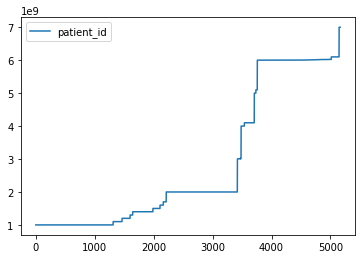

In [93]:
import matplotlib.pyplot as plt

plt.figure()
PI_df.plot()
plt.legend(loc='best')